## House price prediction

### Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition & Description

In [3]:
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\House_price\\train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 2. Exploratory Data Analysis (EDA)

In [102]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values()

In [104]:
correlation

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [134]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
target_corr = corr_matrix['SalePrice'].sort_values(ascending=True)

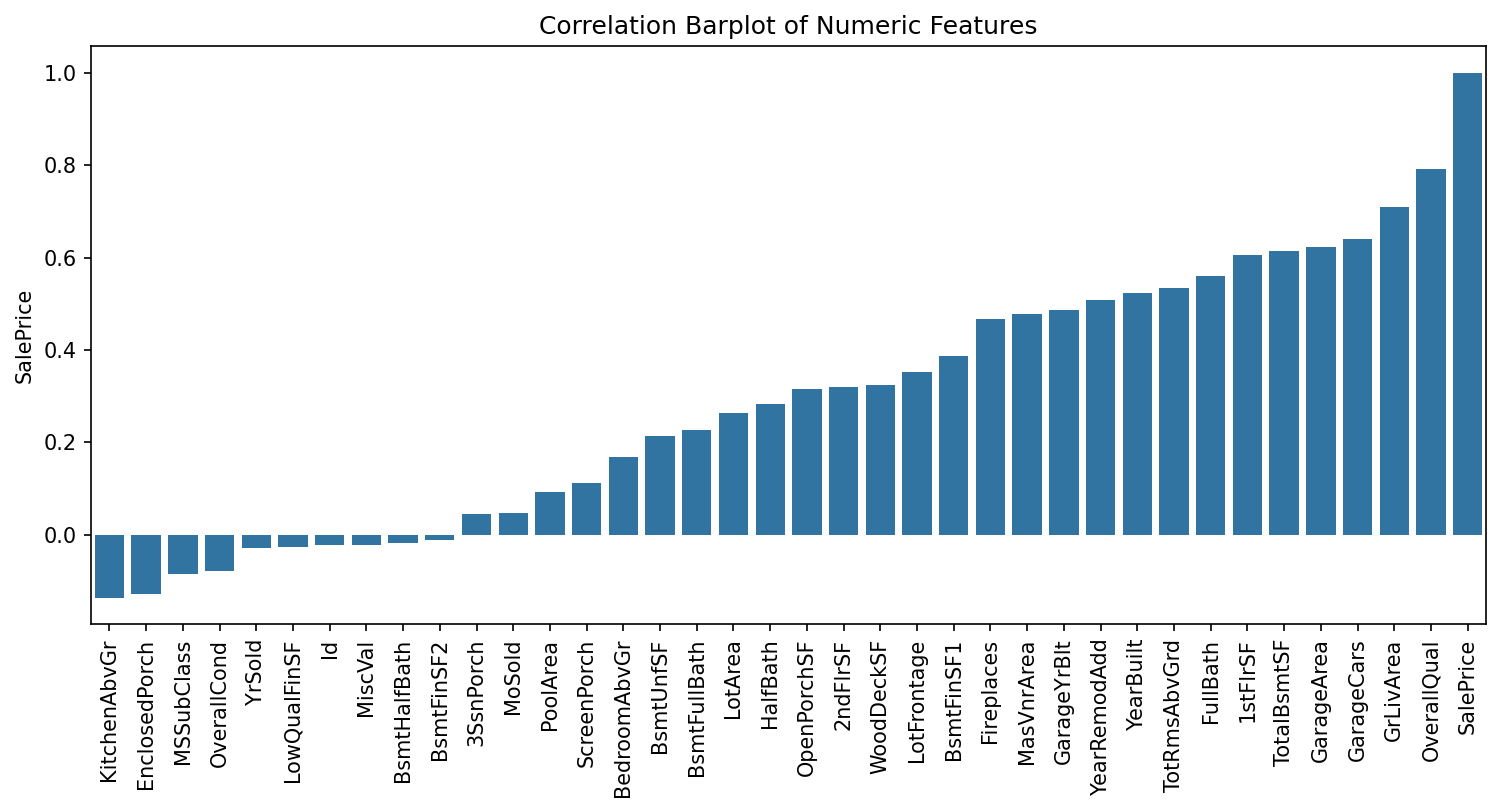

In [144]:
plt.figure(figsize=(12,5),dpi=150)
sns.barplot(target_corr)
plt.title('Correlation Barplot of Numeric Features')
plt.xticks(rotation=90);

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

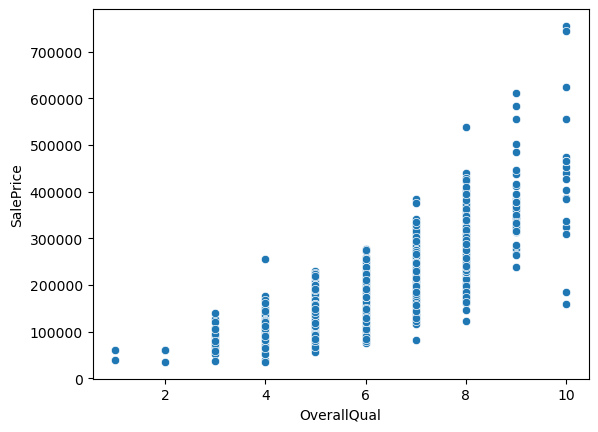

In [24]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

In [42]:
df[(df['OverallQual'] ==10) & (df['SalePrice']<200000)]
# Identify potential outliers: points with OverallQual =10 and SalePrice < 200000

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [54]:
potential_outliers=df[(df['OverallQual'] ==10) & (df['SalePrice']<200000)]

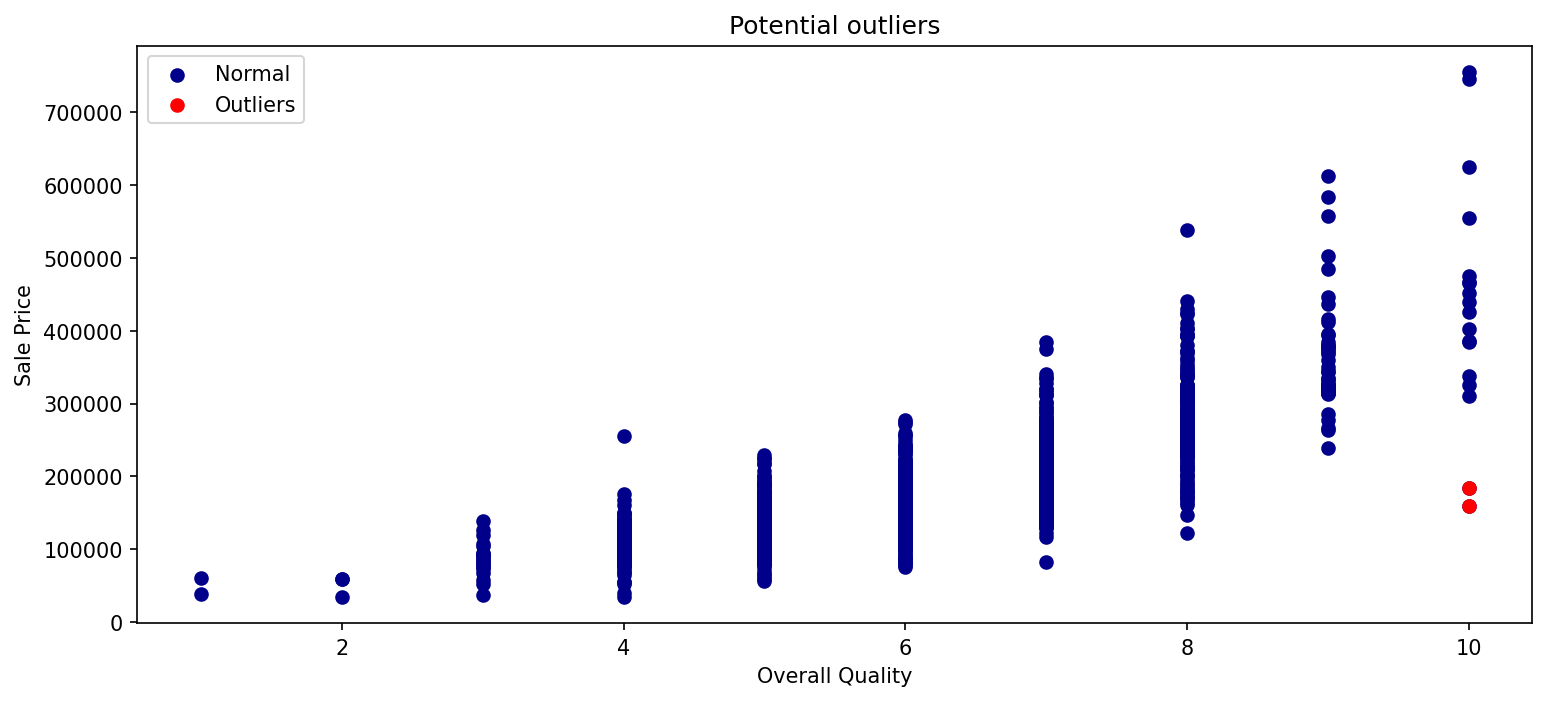

In [62]:
# Scatter plot with highlighted outliers
plt.figure(figsize=(12,5), dpi=150)

plt.scatter(df['OverallQual'], df['SalePrice'], color='darkblue', label='Normal')
plt.scatter(potential_outliers['OverallQual'], potential_outliers['SalePrice'], color='red', label='Outliers')

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

plt.title('Potential outliers')

plt.legend()

In [64]:
ind_outl_qual = df[(df['OverallQual'] ==10) & (df['SalePrice']<200000)].index

Text(0.5, 1.0, 'Corr between GrLivArea and Sale Price')

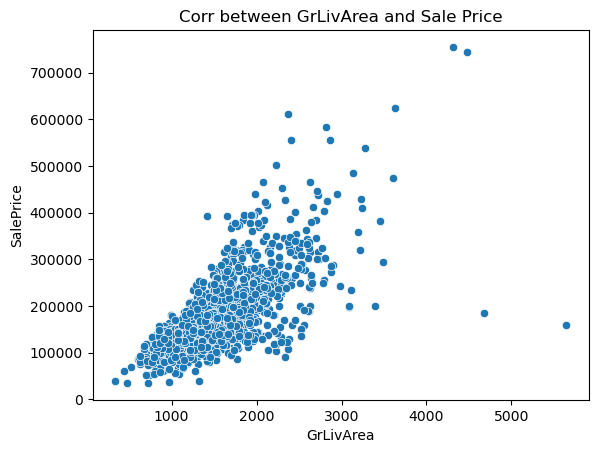

In [68]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title('Corr between GrLivArea and Sale Price')

In [88]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]
# Identify potential outliers: points with GrLivArea > 4000 and SalePrice < 200000
# The points are same as the previous ones

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [90]:
outliers_grlivarea = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]

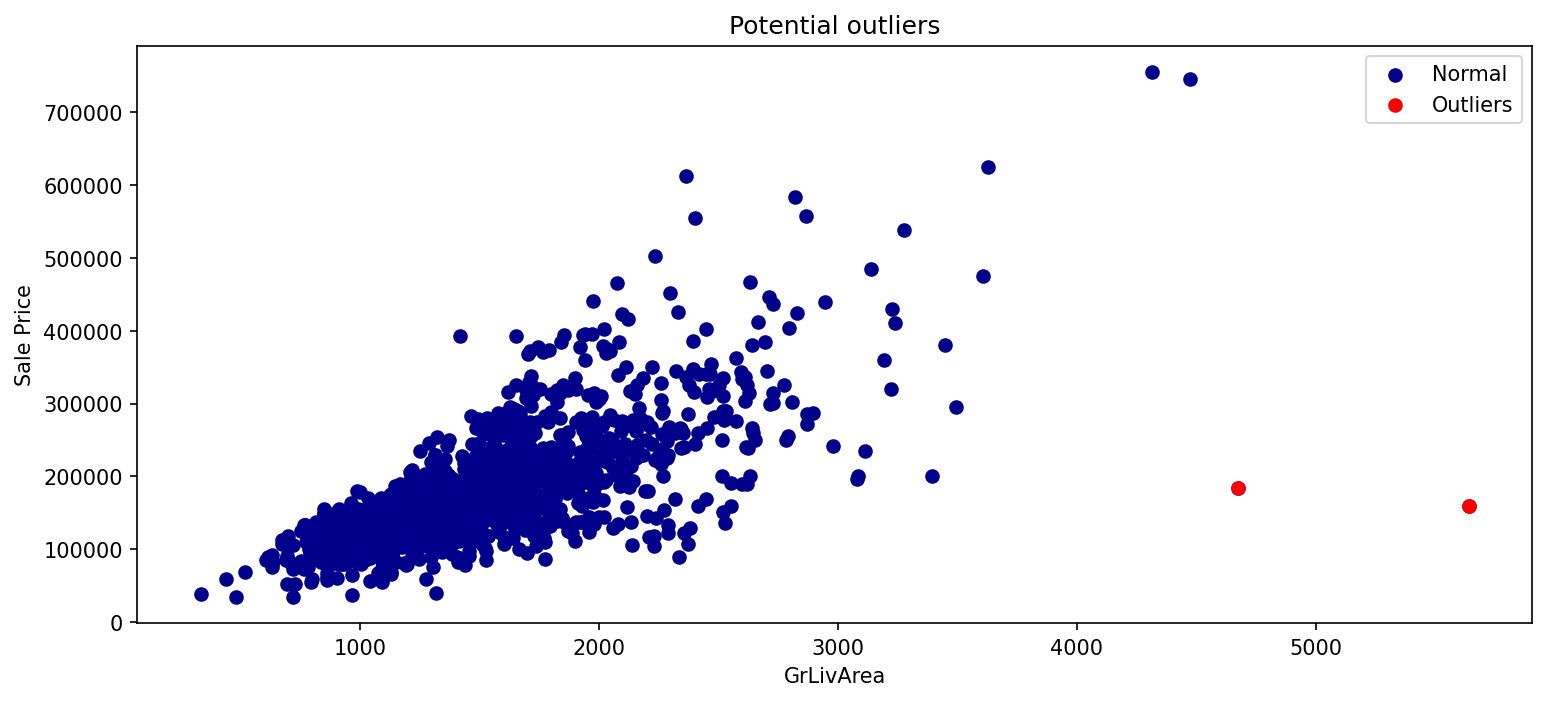

In [98]:
# Scatter plot with highlighted outliers
plt.figure(figsize=(12, 5), dpi =150)

plt.scatter(df['GrLivArea'], df['SalePrice'], color='darkblue', label='Normal')
plt.scatter(outliers_grlivarea['GrLivArea'], outliers_grlivarea['SalePrice'], color='red', label='Outliers')

plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')

plt.title('Potential outliers')
plt.legend()

In [100]:
int_outl_grlivarea = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index

### Missing Data

In [ ]:
#Function to count missing values in percentage

def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result